# The `QuantumState` class

Express an N-qubit quantum state as an array of N columns, where rows are binary bit values, complemented by a vector of coefficients. Note the similarity with the symplectic representation - indeed, the QuantumState class will infact set the above array as the X block in a PauliwordOp, with the Z block its complement.

What we are doing here is writing $|0\rangle = Z|0\rangle$ and $|1\rangle = X|0\rangle$, which ensures correct phases when multiplying the state by Pauli operators, since

$$X|0\rangle = XZ|0\rangle = -iY|0\rangle = |1\rangle,\; X|1\rangle = XX|0\rangle = |0\rangle$$
$$Y|0\rangle = YZ|0\rangle = iX|0\rangle = i|1\rangle,\; Y|1\rangle = YX|0\rangle = -iZ|0\rangle = -i|0\rangle$$
$$Z|0\rangle = ZZ|0\rangle = |0\rangle,\; Z|1\rangle = ZX|0\rangle = iY|0\rangle = -|1\rangle$$

Finally, we have $$| \vec{b} \rangle = \bigotimes_{i=1}^N \big(b_i X + (1-b_i) Z\big) | \vec{0} \rangle$$ and we may drop the zero vector and use the functionality of PauliwordOp to manipulate quantum states. In this represenation, a quantum state is stored as an operator consisting of Paulis $X, Z$, which is implicitly applied to the zero (or vacuum) state. 

In [1]:
import numpy as np
from symmer.symplectic import PauliwordOp, QuantumState

Firstly, note the correct phases under multiplication by a Pauli Y:

In [2]:
zero = QuantumState([[0]])
one = QuantumState([[1]])
Y = PauliwordOp.from_list(['Y'], [1])

print(f'{zero} -> {Y * zero}')
print(f'{one} -> {Y * one}')

 1.000+0.000j |0> ->  0.000+1.000j |1>
 1.000+0.000j |1> ->  0.000-1.000j |0>


Now, let's see what happens when we apply the Hadamard gate to the zero state:

In [3]:
psi = QuantumState([[0,0]])
had = PauliwordOp.from_list(['XZ','ZX','XX', 'ZZ'], np.ones(4)/2) # 2-qubit Hadamard gate decomposed over Paulis
eq_superposition = had * psi
print(f'Zero state: {psi}\n')
print(f'After application of the Hadamard gate:\n\n{eq_superposition}')

Zero state:  1.000+0.000j |00>

After application of the Hadamard gate:

 0.500+0.000j |00> +
 0.500+0.000j |01> +
 0.500+0.000j |10> +
 0.500-0.000j |11>


Observe that the QuantumState is represented internally by its `state_op`, a PauliwordOp object that governs its behaviour under multiplication

In [4]:
print(eq_superposition.state_op)

 0.500+0.000j ZZ +
 0.500+0.000j ZX +
 0.500+0.000j XZ +
 0.500-0.000j XX


Try evaluating expectation values for randomly generated state and Hermitian operators:

In [5]:
def random_state(num_qubits, num_terms):
    """ Generates a random normalized QuantumState
    """
    # random binary array with N columns, M rows
    random_state = np.random.randint(0,2,(num_terms,num_qubits))
    # random vector of coefficients
    coeff_vec = (
        np.random.rand(num_terms) + 
        np.random.rand(num_terms)*1j
    )
    return QuantumState(random_state, coeff_vec).normalize

def random_herm_op(num_qubits, num_terms):
    """ Generates a random PaulwordOp
    """
    # random binary array with 2N columns, M rows
    random_symp_mat = np.random.randint(0,2,(num_terms,num_qubits*2))
    # random vector of coefficients
    coeff_vec = np.random.rand(num_terms)
    coeff_vec/=coeff_vec[::-1]
    coeff_vec*=(2*np.random.randint(0,2,num_terms)-1)
    return PauliwordOp(random_symp_mat, coeff_vec)

In [6]:
N = 10 # number of qubits
M = 10 # number of terms

psi_1 = random_state(N, M)
psi_2 = random_state(N, M)

print(psi_1)
print()
print(psi_2)

 0.047+0.216j |1111001101> +
 0.081+0.103j |1111101001> +
 0.067+0.226j |1111000010> +
 0.294+0.212j |1000010110> +
 0.370+0.130j |1011001000> +
 0.012+0.121j |1111000100> +
 0.242+0.209j |0101010111> +
 0.048+0.334j |0000001111> +
 0.251+0.378j |0010110111> +
 0.326+0.223j |0001000011>

 0.303+0.285j |1110000010> +
 0.135+0.082j |1100101010> +
 0.231+0.077j |0100101011> +
 0.171+0.172j |0000011001> +
 0.246+0.416j |1001000110> +
 0.196+0.292j |1101100110> +
 0.072+0.286j |1111110110> +
 0.163+0.074j |1000000010> +
 0.212+0.337j |1111000011> +
 0.218+0.018j |1000001000>


In [7]:
psi = (psi_1 + psi_2).normalize
print(psi)
print()
print('Norm:', psi.conjugate * psi)

 0.034+0.236j |0000001111> +
 0.121+0.122j |0000011001> +
 0.231+0.157j |0001000011> +
 0.177+0.267j |0010110111> +
 0.163+0.054j |0100101011> +
 0.171+0.148j |0101010111> +
 0.115+0.052j |1000000010> +
 0.154+0.013j |1000001000> +
 0.208+0.150j |1000010110> +
 0.174+0.294j |1001000110> +
 0.262+0.092j |1011001000> +
 0.096+0.058j |1100101010> +
 0.139+0.207j |1101100110> +
 0.214+0.201j |1110000010> +
 0.048+0.160j |1111000010> +
 0.150+0.239j |1111000011> +
 0.009+0.085j |1111000100> +
 0.033+0.153j |1111001101> +
 0.057+0.073j |1111101001> +
 0.051+0.202j |1111110110>

Norm: (0.9999999999999997+0j)


In [8]:
op = random_herm_op(N, 10)
print(op)
print()
print('Expectation value <psi|op|psi> =', psi.conjugate * op * psi)

-0.944+0.000j XIZXZIZZXX +
 0.979+0.000j XYZIYYYYZX +
 0.074+0.000j IYIIYYYZIY +
-1.167+0.000j IIIZXIXYZY +
 1.181+0.000j XIYIZIZXZZ +
-0.847+0.000j IYXIIYZXZZ +
-0.857+0.000j IZXYYYYXXY +
 13.540+0.000j YXYZYZZIYI +
 1.022+0.000j ZXZYIYYZXY +
 1.059+0.000j ZXIXIYYYXI

Expectation value <psi|op|psi> = (0.16813528178438208-3.469446951953614e-18j)


It is also possible to convert from a $2^N$ dimensional statevector over $N$ qubits to a `QuantumState` object, via the `array_to_QuantumState` function:

In [9]:
statevector = np.zeros(2**10).reshape([-1,1])
statevector[0]   = np.sqrt(1/6)
statevector[250] = np.sqrt(2/6)
statevector[500] = np.sqrt(3/6)
psi = QuantumState.from_array(statevector)
print(psi)
print(psi.conjugate * psi)

 0.408+0.000j |0000000000> +
 0.577+0.000j |0011111010> +
 0.707+0.000j |0111110100>
(1+0j)


# plotting probabillity amplitudes of quantum state

In [10]:
%matplotlib inline
random_state = QuantumState.haar_random(3, vec_type='ket')
print(random_state)

 0.167+0.369j |000> +
 0.325+0.192j |001> +
-0.198+0.010j |010> +
-0.206-0.504j |011> +
 0.070-0.183j |100> +
 0.194+0.183j |101> +
-0.227-0.124j |110> +
 0.387-0.177j |111>


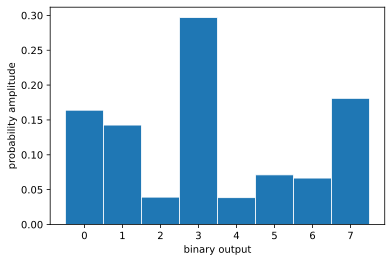

In [47]:
ax = random_state.plot_state()

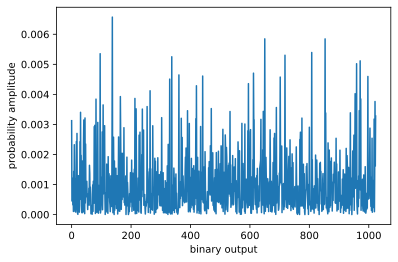

In [48]:
%matplotlib inline
random_large_state = QuantumState.haar_random(10, vec_type='ket')
ax2 = random_large_state.plot_state()